In [1]:
import scanpy as sc
import scrnatools as rna
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import pandas as pd
import numpy as np

/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [2]:
sc.set_figure_params(dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False

In [3]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

In [4]:
adata = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/Fezf2_EnR_TECs.h5ad")

In [5]:
WT = sc.read_10x_h5(f"{rawDataPath}/Thymus/Fezf2_EnR/fastqs/WT/WT/outs/filtered_feature_bc_matrix.h5")
WT.var_names_make_unique()
WT.obs_names = [i.split("-")[0] for i in WT.obs_names]
KO = sc.read_10x_h5(f"{rawDataPath}/Thymus/Fezf2_EnR/fastqs/Fezf2_KO/Fezf2_KO/outs/filtered_feature_bc_matrix.h5")
KO.var_names_make_unique()
KO.obs_names = [i.split("-")[0] for i in KO.obs_names]
KO_EnR = sc.read_10x_h5(f"{rawDataPath}/Thymus/Fezf2_EnR/fastqs/Fezf2_KO_EnR/Fezf2_KO_EnR/outs/filtered_feature_bc_matrix.h5")
KO_EnR.var_names_make_unique()
KO_EnR.obs_names = [i.split("-")[0] for i in KO_EnR.obs_names]

/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/annd

In [6]:
WT_B6 = sc.read_10x_h5(f"{rawDataPath}Thymus/Fezf2_KO/fastqs/Fezf2_WT2/B6_WT/outs/filtered_feature_bc_matrix.h5")
WT_B6.var_names_make_unique()

/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/joe/miniconda3/envs/fezf2-thymus/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
adata_PLAP = ad.concat(
    [WT, KO, KO_EnR],
    label="batch",
    index_unique="-",
    keys=["WT", "Fezf2_KO", "Fezf2_KO_EnR"],   
)

In [8]:
adata_PLAP = adata_PLAP[adata_PLAP.obs_names.isin(adata.obs_names)]
adata = adata[adata.obs_names.isin(adata_PLAP.obs_names)]

In [9]:
adata_PLAP.raw = adata_PLAP
sc.pp.normalize_total(adata_PLAP, target_sum=1e4)
sc.pp.log1p(adata_PLAP)

In [10]:
exprs = pd.DataFrame(adata_PLAP.X.todense(), index=adata_PLAP.obs_names, columns=adata_PLAP.var_names)
WT_B6_exprs = pd.DataFrame(WT_B6.X.todense(), index=WT_B6.obs_names, columns=WT_B6.var_names)

In [11]:
Fezf2 = exprs["Fezf2"]
Fezf2 = pd.DataFrame(Fezf2[Fezf2 > 0], columns=["Fezf2"])
Fezf2["x"] = "Fezf2"
Fezf2["genotype"] = adata_PLAP.obs.batch

In [12]:
plap = exprs["hPLAP"]
plap = pd.DataFrame(plap[plap > 0], columns=["hPLAP"])
plap["x"] = "hPLAP"
plap["genotype"] = adata_PLAP.obs.batch

In [13]:
plap_B6 = WT_B6_exprs["hPLAP"]
plap_B6 = pd.DataFrame(plap_B6[plap_B6 > 0], columns=["hPLAP"])
plap_B6["x"] = "hPLAP"
plap_B6["genotype"] = "WT_B6"

In [14]:
WT_B6_exprs["hPLAP"].value_counts()

0.0    6672
1.0       1
Name: hPLAP, dtype: int64

In [15]:
pd.concat([plap, plap_B6])

,hPLAP,x,genotype
AAACCCACATGGGCAA-WT,0.427685,hPLAP,WT
AAACGAAGTTGTGCCG-WT,0.854680,hPLAP,WT
AAACGCTAGATACCAA-WT,0.355641,hPLAP,WT
AAAGGATAGGAGTCTG-WT,0.999107,hPLAP,WT
AAAGGTAGTAGGAAAG-WT,0.713129,hPLAP,WT
...,...,...,...
TTTGACTAGTGATAAC-Fezf2_KO_EnR,1.163674,hPLAP,Fezf2_KO_EnR
TTTGGTTCAGCCTATA-Fezf2_KO_EnR,0.719474,hPLAP,Fezf2_KO_EnR
TTTGGTTGTGCCGAAA-Fezf2_KO_EnR,0.429214,hPLAP,Fezf2_KO_EnR
TTTGTTGCAGACCCGT-Fezf2_KO_EnR,1.164058,hPLAP,Fezf2_KO_EnR


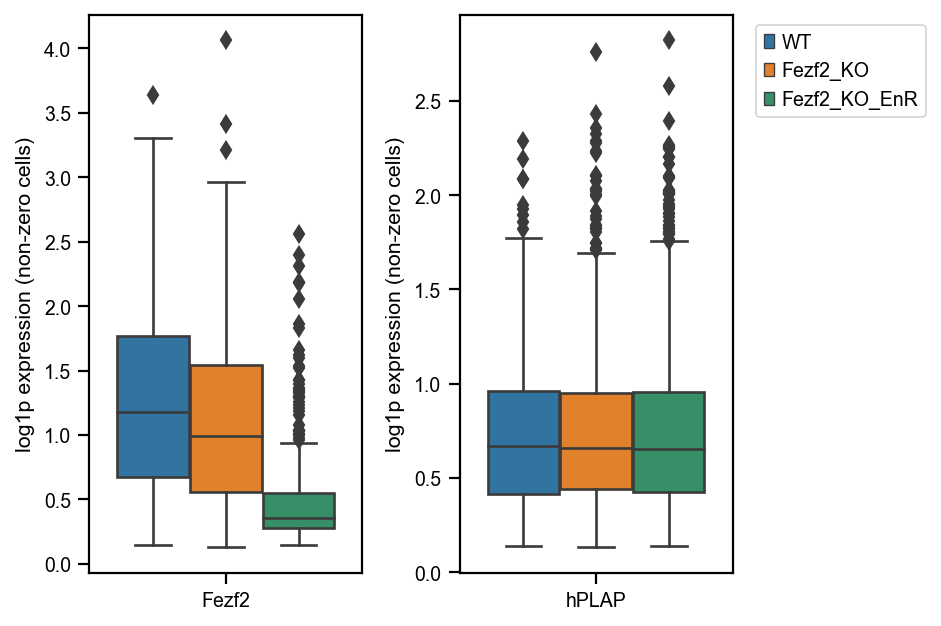

In [16]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
ax = sns.boxplot(
    Fezf2,
    x="x",
    y="Fezf2",
    hue="genotype"
)
ax.set_xlabel("")
ax.set_ylabel("log1p expression (non-zero cells)")
ax.get_legend().remove()

plt.subplot(1,2,2)
ax = sns.boxplot(
    plap,
    x="x",
    y="hPLAP",
    hue="genotype"
)
ax.set_xlabel("")
ax.set_ylabel("log1p expression (non-zero cells)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig("log1p_expression_boxplots.pdf")
plt.show()

In [17]:
Fezf2.genotype.value_counts()/adata_PLAP.obs.batch.value_counts()

WT              0.434385
Fezf2_KO        0.224289
Fezf2_KO_EnR    0.070968
dtype: float64

In [18]:
Fezf2.genotype.value_counts()

WT              1377
Fezf2_KO         639
Fezf2_KO_EnR     319
Name: genotype, dtype: int64

In [19]:
plap.genotype.value_counts()/adata_PLAP.obs.batch.value_counts()

WT              0.155521
Fezf2_KO        0.328887
Fezf2_KO_EnR    0.435373
dtype: float64

In [20]:
plap.genotype.value_counts()

Fezf2_KO_EnR    1957
Fezf2_KO         937
WT               493
Name: genotype, dtype: int64

In [21]:
adata_PLAP.layers["log1p"] = adata_PLAP.X.copy()
adata_PLAP.obsm = adata.obsm

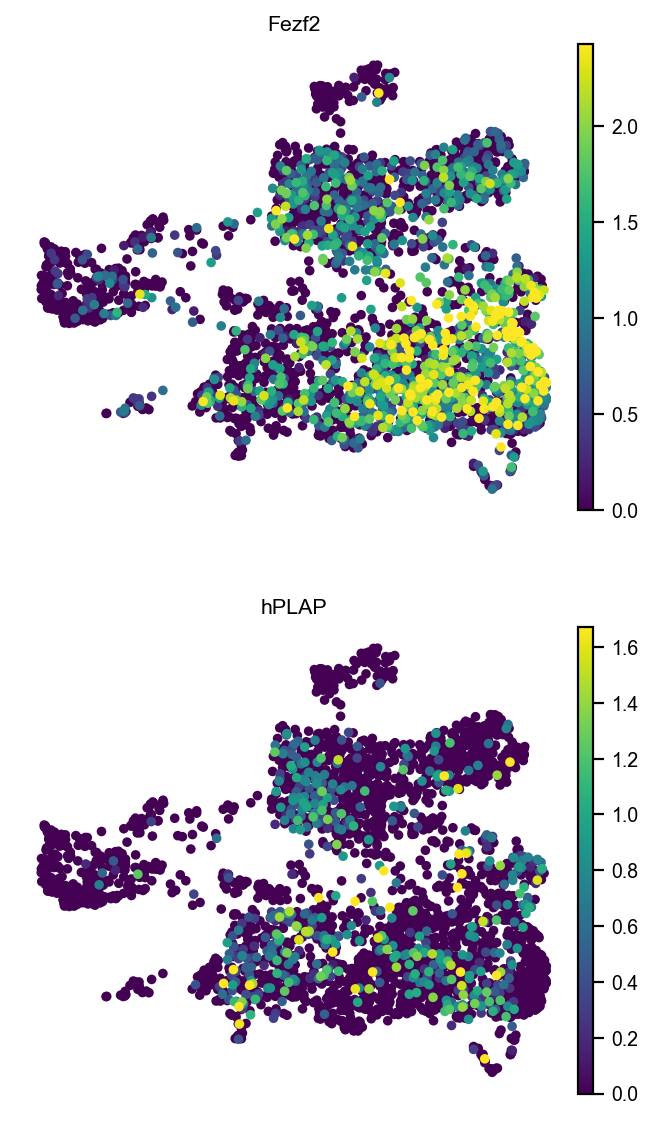

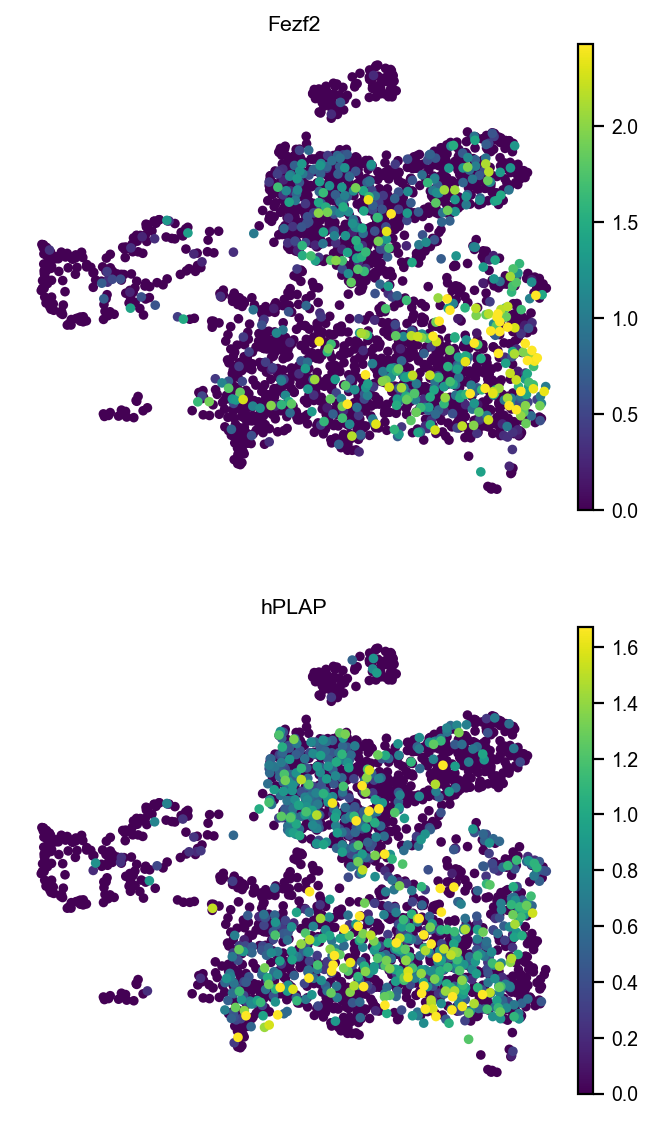

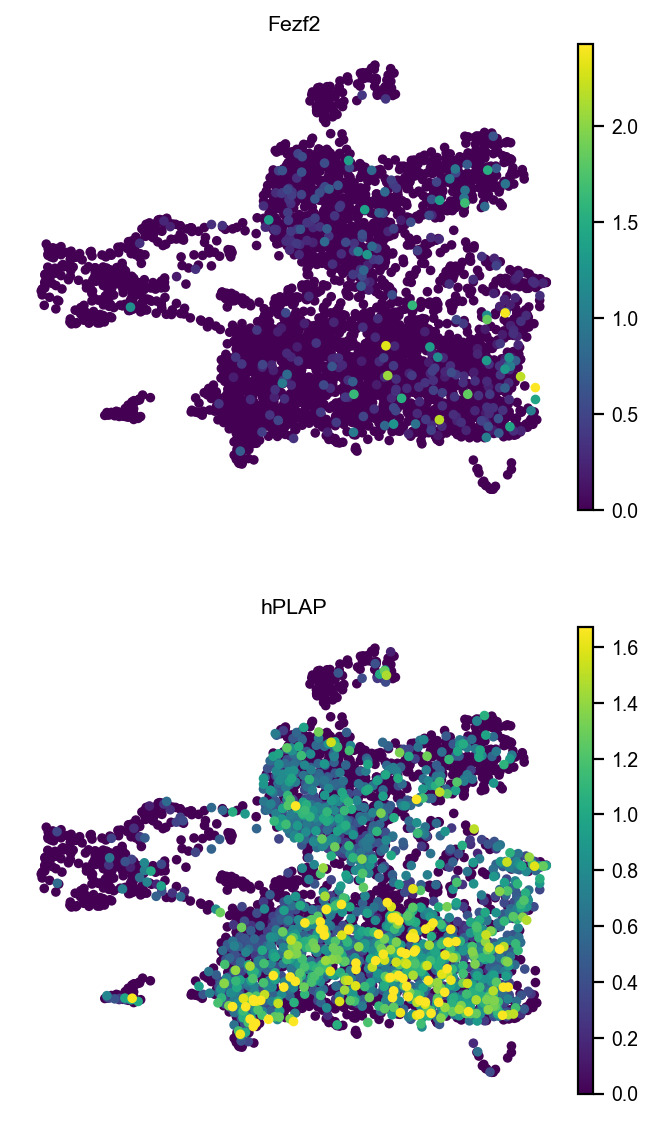

In [23]:
vmin = []
vmax = []
for gene in ["Fezf2", "hPLAP"]:
    vmin.append(np.quantile(adata_PLAP[:, gene].layers["log1p"].todense().tolist(), 0.01))
    vmax.append(np.quantile(adata_PLAP[:, gene].layers["log1p"].todense().tolist(), 0.99))

sc.pl.umap(
    adata_PLAP[adata_PLAP.obs.batch == "WT"],
    color=["Fezf2", "hPLAP"],
    layer="log1p",
    s=75,
    vmin=vmin,
    vmax=vmax,
    ncols=1,
    save="_WT_expression.pdf"
)
sc.pl.umap(
    adata_PLAP[adata_PLAP.obs.batch == "Fezf2_KO"],
    color=["Fezf2", "hPLAP"],
    layer="log1p",
    s=75,
    vmin=vmin,
    vmax=vmax,
    ncols=1,
    save="_Fezf2_KO_expression.pdf"
)
sc.pl.umap(
    adata_PLAP[adata_PLAP.obs.batch == "Fezf2_KO_EnR"],
    color=["Fezf2", "hPLAP"],
    layer="log1p",
    s=75,
    vmin=vmin,
    vmax=vmax,
    ncols=1,
    save="_Fezf2_KO_EnR_expression.pdf"
)